In [59]:
## Importamos las librerias, clases y les asignamos un alias para utilizar en codigo posteriormente
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

## Leer los datos del archivo csv
data_jmojica = pd.read_csv('car_data.csv')

## Mostar dataset
print()
print("Confirmar lectura de Dataset y mostrar en pantalla")
print()
data_jmojica.head()


Confirmar lectura de Dataset y mostrar en pantalla



,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [60]:
## Descripción de los datos
data_jmojica.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [79]:
## Buscar datos nulos en el df
resp1 = df.isnull().any().any()
print()
print ("Evaluando valores faltantes en el df")
print()
print("¿Existen valores nulos en el df?")
print(f"Rta: {resp1}")
print()
## Buscar datos vacios en el df
#print(df.isna().sum())


Evaluando valores faltantes en el df

¿Existen valores nulos en el df?
Rta: False



In [80]:
print("Cantidad de Registros con cero en Year: ",data_jmojica['Year'].isin([0]).sum())
print("Cantidad de Registros con cero en Selling_Price: ",data_jmojica['Selling_Price'].isin([0]).sum())
print("Cantidad de Registros con cero en Present_Price: ",data_jmojica['Present_Price'].isin([0]).sum())
print("Cantidad de Registros con cero en Kms_Driven: ",data_jmojica['Kms_Driven'].isin([0]).sum())

Cantidad de Registros con cero en Year:  0
Cantidad de Registros con cero en Selling_Price:  0
Cantidad de Registros con cero en Present_Price:  0
Cantidad de Registros con cero en Kms_Driven:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

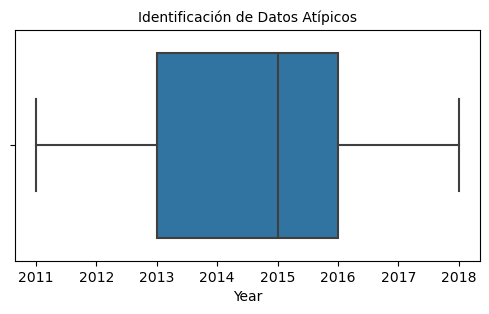

In [86]:
## Omitiendo datos atipicos
year_min = 2010
data_jmojica=data_jmojica[(data_jmojica['Year']>year_min)]

## Reprocesando validacion de datos atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data_jmojica['Year'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

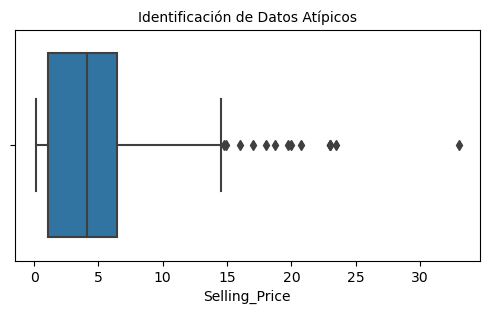

In [87]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data_jmojica['Selling_Price'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [84]:
data_jmojica.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       260 non-null    object 
 1   Year           260 non-null    int64  
 2   Selling_Price  260 non-null    float64
 3   Present_Price  260 non-null    float64
 4   Kms_Driven     260 non-null    int64  
 5   Fuel_Type      260 non-null    object 
 6   Seller_Type    260 non-null    object 
 7   Transmission   260 non-null    object 
 8   Owner          260 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 20.3+ KB


In [95]:
data_jmojica['Selling_Price'].value_counts()

Selling_Price
0.60     8
4.50     7
0.45     7
5.25     6
4.75     5
        ..
20.75    1
3.45     1
5.90     1
12.50    1
11.50    1
Name: count, Length: 140, dtype: int64

In [118]:
## Extraemos los datos que nos son numericos, ya que el modelo genera error al intentar procesaor predicciones de cadenas de texto
X = data_jmojica.drop(['Car_Name','Selling_Price','Fuel_Type','Seller_Type','Transmission'], axis=1)
Y = data_jmojica['Selling_Price']

# Asegurar que haya al menos 2 ejemplos por clase en ambos conjuntos de datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [119]:
modelo_linear = LinearRegression()
modelo_linear.fit (X_train , Y_train)

prediccion = modelo_linear.predict(X_test)

In [123]:
print (prediccion)

[ 7.34388854  1.81475218  9.8150975  10.37083596  4.32790731  6.36012935
  6.926807    7.54943419  4.76641958 -2.31038493  5.13758789  4.03174528
  9.61023474  1.0882681   5.33605792 14.92940814  7.06359727  5.31964651
  2.10084567 -0.02447965  3.46440707  5.92613572  3.07094739  4.27245689
  7.82848192  0.46233043  2.93622509  6.24893467  4.06148881  9.61662533
  2.53412431  2.51734085  1.26697198  0.27640713  4.14390179  0.35221522
  0.77285625  4.04321805  4.10184019  1.75620645  8.92905357  1.52530982
  4.12310042  1.22196411  7.4251451   5.21533968  0.44102065  4.04926274
  2.18711863  0.87680086  4.60536157 20.77126054 -0.11659229  3.68139525
  9.86332892 10.8112088   1.97592212  2.12353101  4.1724911   2.3791546
  2.13229149  3.39521391  4.10018176  7.15437817 -0.3485892   0.75775381
 -0.07413397  5.5736014   2.29471904  4.47114714  6.14861341  0.13981141
  5.24161569  9.3226582   5.95463682  1.95514784  7.50082444  0.35353261
 20.77126054 -0.17616342  5.70584226  1.11415794  4.


Grafica de dispersion de los data_jmojica y la linea de regresion



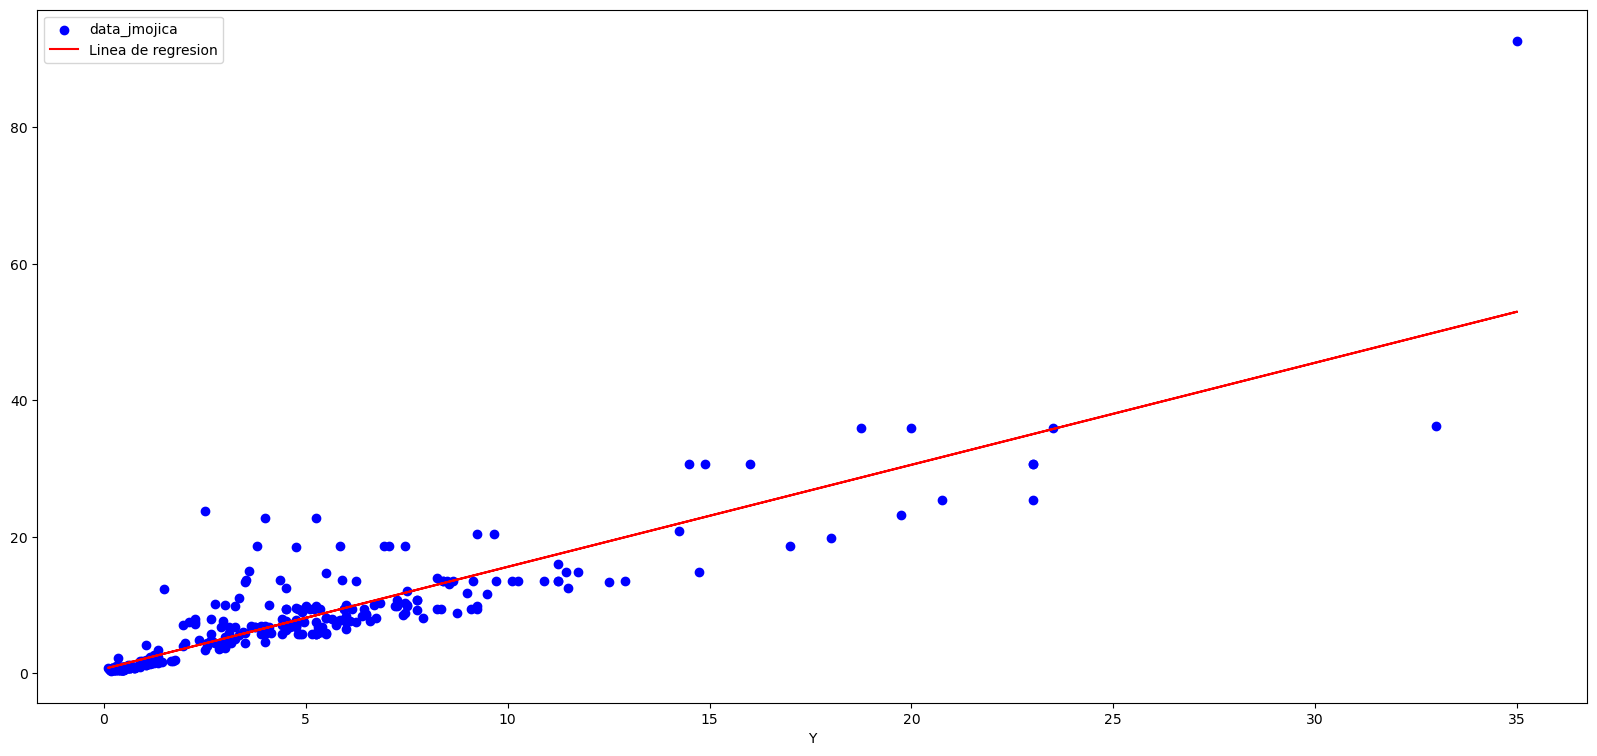

In [132]:
## Grafica de dispersion de los data_jmojica y la linea de regresion
print()
print("Grafica de dispersion de los data_jmojica y la linea de regresion")
print()
plt.scatter(x, y, color='blue', label='data_jmojica')
plt.plot(x, modelo.predict(x), color='red', label='Linea de regresion')
plt.rcParams['figure.figsize'] = (20, 9)
plt.xlabel('X')
plt.xlabel('Y')
plt.legend()
plt.show()

In [135]:
# Desempeño del modelo de regresión

#print(classification_report(Y_test,prediccion)) ## ValueError: continuous is not supported

## Calcular las metricas
# Calcular MSE
mse = mean_squared_error(Y_test,prediccion)
# Calcular RMSE
rmse = np.sqrt(mse)
# Calcular MAE
mae = mean_absolute_error(Y_test,prediccion)
# Calcular R^2
r2 = r2_score(Y_test,prediccion)

## Imprimir las metricas ( MSE, RMSE, MAE, R^2)
print()
print(f" Error Cuadratico Medio (MSE) : {mse}")
print()
print(f" Raiz del Error Cuadratico Medio (RMSE) : {rmse}")
print()
print(f" Error Absoluto Medio (MAE) : {mae}")
print()
print(f" Coeficiente de Determinacion (R^2) : {r2}")



 Error Cuadratico Medio (MSE) : 1.5586875819358927

 Raiz del Error Cuadratico Medio (RMSE) : 1.248474101427776

 Error Absoluto Medio (MAE) : 0.9637227029655001

 Coeficiente de Determinacion (R^2) : 0.9205257552412565
